1. Memahami Struktur Data

In [6]:

import pandas as pd


file_path = "Customer_Segmentation.csv"  
data = pd.read_csv(file_path)


print("\n--- Struktur Data ---")
print(data.info())


print("\n--- 5 Data Teratas ---")
print(data.head())



--- Struktur Data ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Customer Id      850 non-null    int64  
 1   Age              850 non-null    int64  
 2   Edu              850 non-null    int64  
 3   Years Employed   850 non-null    int64  
 4   Income           850 non-null    int64  
 5   Card Debt        850 non-null    float64
 6   Other Debt       850 non-null    float64
 7   Defaulted        700 non-null    float64
 8   Address          850 non-null    object 
 9   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 66.5+ KB
None

--- 5 Data Teratas ---
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2  

2. Statistik Deskriptif

In [7]:
print("\n--- Statistik Deskriptif ---")
print(data.describe())



--- Statistik Deskriptif ---
       Customer Id         Age         Edu  Years Employed      Income  \
count    850.00000  850.000000  850.000000      850.000000  850.000000   
mean     425.50000   35.029412    1.710588        8.565882   46.675294   
std      245.51816    8.041432    0.927784        6.777884   38.543054   
min        1.00000   20.000000    1.000000        0.000000   13.000000   
25%      213.25000   29.000000    1.000000        3.000000   24.000000   
50%      425.50000   34.000000    1.000000        7.000000   35.000000   
75%      637.75000   41.000000    2.000000       13.000000   55.750000   
max      850.00000   56.000000    5.000000       33.000000  446.000000   

        Card Debt  Other Debt   Defaulted  DebtIncomeRatio  
count  850.000000  850.000000  700.000000       850.000000  
mean     1.576820    3.078773    0.261429        10.171647  
std      2.125843    3.398799    0.439727         6.719441  
min      0.012000    0.046000    0.000000         0.100000 

3. Visualisasi Data

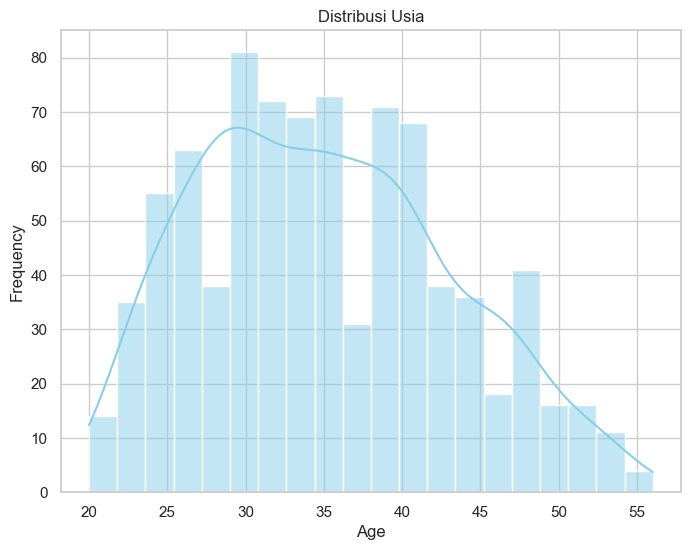

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


sns.set(style="whitegrid")


plt.figure(figsize=(8, 6))
sns.histplot(data['Age'], bins=20, kde=True, color="skyblue")
plt.title("Distribusi Usia")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


4. Korelasi Antar Variabel Numerik

In [10]:

print(data.dtypes)


print(data.head())


Customer Id          int64
Age                  int64
Edu                  int64
Years Employed       int64
Income               int64
Card Debt          float64
Other Debt         float64
Defaulted          float64
Address             object
DebtIncomeRatio    float64
dtype: object
   Customer Id  Age  Edu  Years Employed  Income  Card Debt  Other Debt  \
0            1   41    2               6      19      0.124       1.073   
1            2   47    1              26     100      4.582       8.218   
2            3   33    2              10      57      6.111       5.802   
3            4   29    2               4      19      0.681       0.516   
4            5   47    1              31     253      9.308       8.908   

   Defaulted Address  DebtIncomeRatio  
0        0.0  NBA001              6.3  
1        0.0  NBA021             12.8  
2        1.0  NBA013             20.9  
3        0.0  NBA009              6.3  
4        0.0  NBA008              7.2  


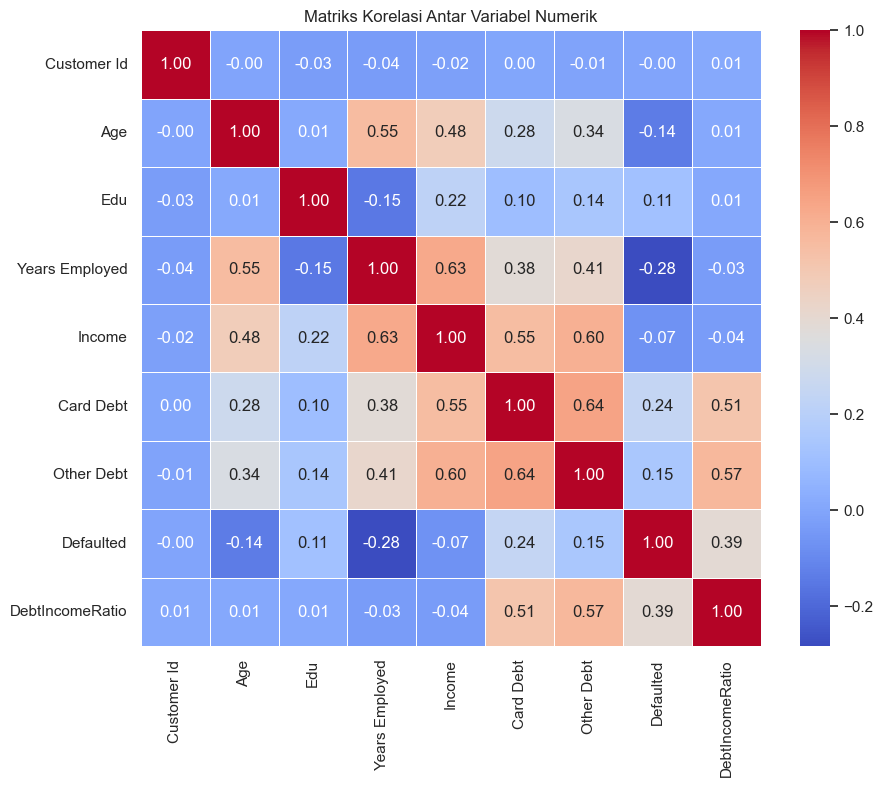

In [11]:

numerical_data = data.select_dtypes(include=['number'])


correlation_matrix = numerical_data.corr()


import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Matriks Korelasi Antar Variabel Numerik")
plt.show()


In [12]:

for col in numerical_data.columns:
    try:
        numerical_data[col].astype(float)
    except ValueError:
        print(f"Kolom '{col}' mengandung nilai non-numerik.")


5. Analisis Data Kategorik

C:\Users\marka\AppData\Local\Temp\ipykernel_28376\1953818563.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=data, x='Defaulted', palette='pastel')


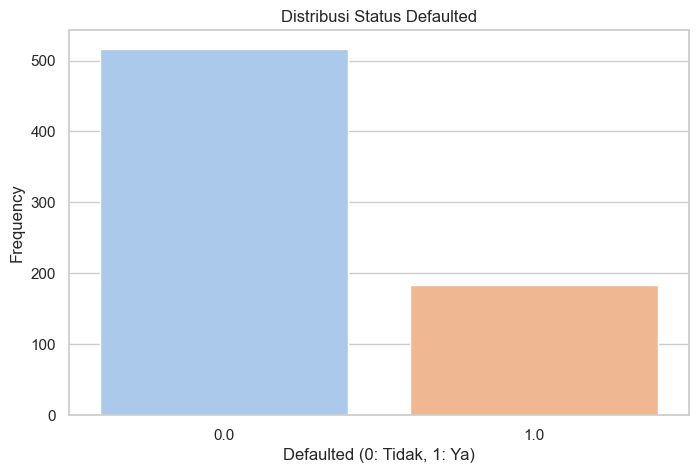

In [13]:
# Analisis kolom 'Defaulted'
plt.figure(figsize=(8, 5))
sns.countplot(data=data, x='Defaulted', palette='pastel')
plt.title("Distribusi Status Defaulted")
plt.xlabel("Defaulted (0: Tidak, 1: Ya)")
plt.ylabel("Frequency")
plt.show()


6. Deteksi Outlier

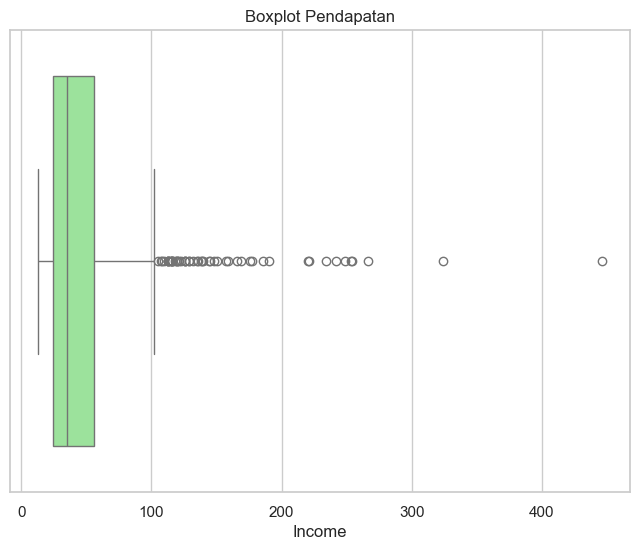

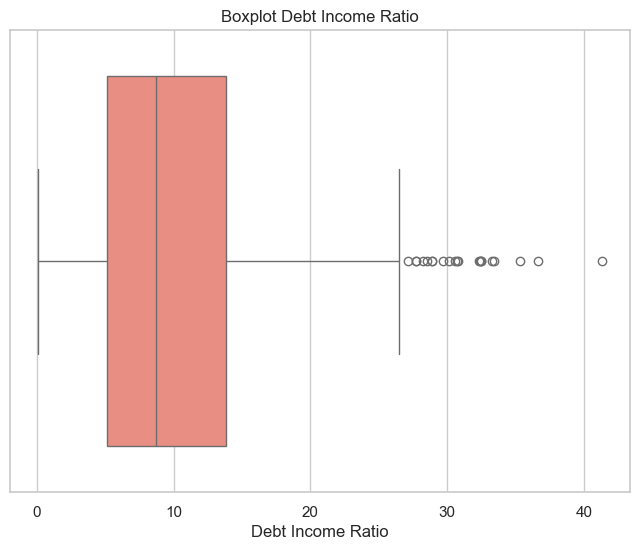

In [14]:
# Boxplot untuk Income
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Income'], color="lightgreen")
plt.title("Boxplot Pendapatan")
plt.xlabel("Income")
plt.show()

# Boxplot untuk Debt Income Ratio
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['DebtIncomeRatio'], color="salmon")
plt.title("Boxplot Debt Income Ratio")
plt.xlabel("Debt Income Ratio")
plt.show()


4 Data Preparation


1. Pembersihan Data

In [15]:

import pandas as pd
from sklearn.impute import SimpleImputer

file_path = "Customer_Segmentation.csv" 
data = pd.read_csv(file_path)


data = data.drop_duplicates()
print(f"Jumlah data setelah menghapus duplikat: {len(data)}")


imputer = SimpleImputer(strategy='most_frequent')  
data['Defaulted'] = imputer.fit_transform(data[['Defaulted']])


print("\nJumlah nilai kosong per kolom setelah imputasi:")
print(data.isnull().sum())


Jumlah data setelah menghapus duplikat: 850

Jumlah nilai kosong per kolom setelah imputasi:
Customer Id        0
Age                0
Edu                0
Years Employed     0
Income             0
Card Debt          0
Other Debt         0
Defaulted          0
Address            0
DebtIncomeRatio    0
dtype: int64


2. Transformasi Data

In [16]:
from sklearn.preprocessing import StandardScaler


numerical_columns = ['Age', 'Years Employed', 'Income', 'Card Debt', 'Other Debt', 'DebtIncomeRatio']
scaler = StandardScaler()

# Normalisasi kolom numerik
data[numerical_columns] = scaler.fit_transform(data[numerical_columns])

print("\nData setelah normalisasi:")
print(data[numerical_columns].head())



Data setelah normalisasi:
        Age  Years Employed    Income  Card Debt  Other Debt  DebtIncomeRatio
0  0.742915       -0.378790 -0.718459  -0.683811   -0.590489        -0.576525
1  1.489490        2.573721  1.384325   1.414474    1.512962         0.391387
2 -0.252518        0.211712  0.268032   2.134141    0.801704         1.597554
3 -0.750235       -0.674041 -0.718459  -0.421643   -0.754467        -0.576525
4  1.489490        3.311849  5.356249   3.638900    1.716094        -0.442507


3. Pengkodean Data Kategorik

In [17]:
from sklearn.preprocessing import LabelEncoder


label_encoder = LabelEncoder()
data['Address'] = label_encoder.fit_transform(data['Address'])

print("\nData setelah pengkodean kategorik:")
print(data[['Address', 'Defaulted']].head())



Data setelah pengkodean kategorik:
   Address  Defaulted
0        1        0.0
1       21        0.0
2       13        1.0
3        9        0.0
4        8        0.0


4. Menyiapkan Data untuk Model

In [18]:

X = data[numerical_columns + ['Address']]  
y = data['Defaulted']  

print("\nDimensi X dan y:")
print("X:", X.shape)
print("y:", y.shape)


Dimensi X dan y:
X: (850, 7)
y: (850,)


5. Split Data untuk Training dan Testing

In [20]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print("\nDimensi data training dan testing:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



Dimensi data training dan testing:
X_train: (595, 7)
X_test: (255, 7)
y_train: (595,)
y_test: (255,)


5. Modelling dan Evaluation

1. Modelling dengan K-means Clustering

Silhouette Score untuk K-means: 0.46


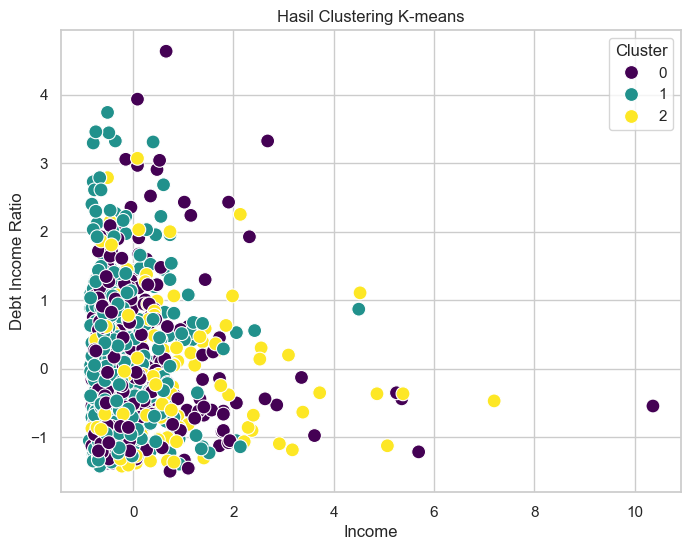

In [21]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


optimal_clusters = 3  
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
clusters = kmeans.fit_predict(X)


data['Cluster'] = clusters


silhouette_avg = silhouette_score(X, clusters)
print(f"Silhouette Score untuk K-means: {silhouette_avg:.2f}")


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(x=data['Income'], y=data['DebtIncomeRatio'], hue=data['Cluster'], palette='viridis', s=100)
plt.title("Hasil Clustering K-means")
plt.xlabel("Income")
plt.ylabel("Debt Income Ratio")
plt.legend(title="Cluster")
plt.show()


2. Modelling dengan Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


logreg = LogisticRegression()
logreg.fit(X_train, y_train)


y_pred = logreg.predict(X_test)


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

accuracy = accuracy_score(y_test, y_pred)
print(f"\nAccuracy Score: {accuracy:.2f}")



Confusion Matrix:
[[190  11]
 [ 38  16]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.83      0.95      0.89       201
         1.0       0.59      0.30      0.40        54

    accuracy                           0.81       255
   macro avg       0.71      0.62      0.64       255
weighted avg       0.78      0.81      0.78       255


Accuracy Score: 0.81


3. Visualisasi Evaluasi Logistic Regression

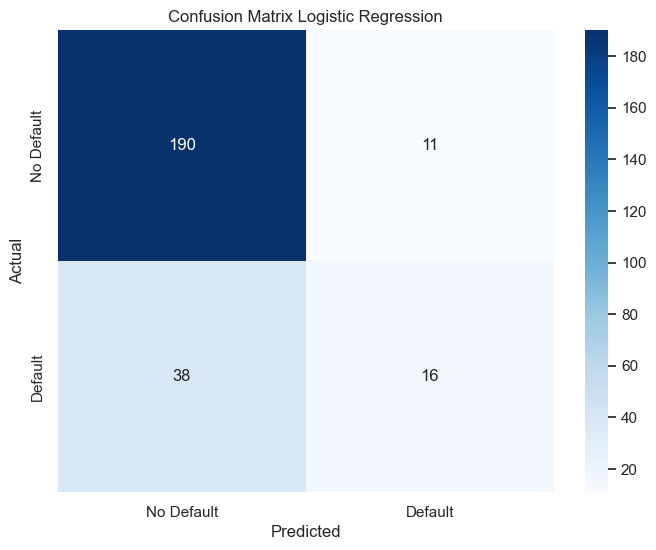

In [23]:

plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', xticklabels=['No Default', 'Default'], yticklabels=['No Default', 'Default'])
plt.title("Confusion Matrix Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


III.5.4 Decision Tree

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Membuat model Decision Tree
dtree = DecisionTreeClassifier(random_state=42)
dtree.fit(X_train, y_train)

# Memprediksi data testing
y_pred_dtree = dtree.predict(X_test)

# Evaluasi model
print("\nConfusion Matrix Decision Tree:")
print(confusion_matrix(y_test, y_pred_dtree))

print("\nClassification Report Decision Tree:")
print(classification_report(y_test, y_pred_dtree))

accuracy_dtree = accuracy_score(y_test, y_pred_dtree)
print(f"\nAccuracy Score Decision Tree: {accuracy_dtree:.2f}")


Confusion Matrix Decision Tree:
[[166  35]
 [ 34  20]]

Classification Report Decision Tree:
              precision    recall  f1-score   support

         0.0       0.83      0.83      0.83       201
         1.0       0.36      0.37      0.37        54

    accuracy                           0.73       255
   macro avg       0.60      0.60      0.60       255
weighted avg       0.73      0.73      0.73       255


Accuracy Score Decision Tree: 0.73
